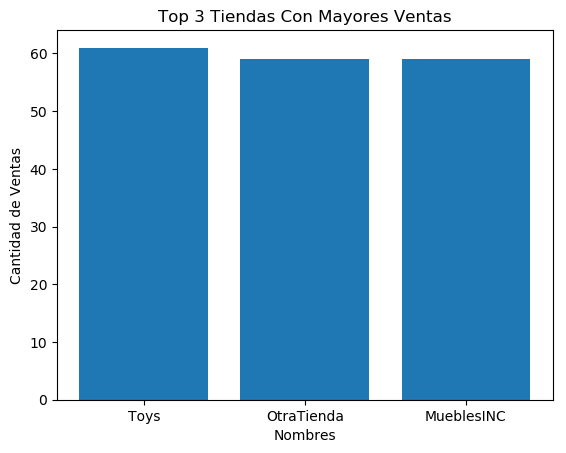

In [77]:
import psycopg2
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt
import numpy as np

myConnection = psycopg2.connect(host = 'localhost', user= 'postgres',password ='pass123', dbname= 'Proyecto1BD')
cur = myConnection.cursor()

cur.execute(" SELECT tienda.nombre, COUNT(venta.idtienda) FROM tienda INNER JOIN venta ON tienda.idtienda = venta.idtienda GROUP BY tienda.nombre ORDER BY (count(*)) DESC LIMIT 3;")
data = cur.fetchall()

label = ('Nombre','Ventas')
x = np.arange(len(data))
ventas = []
nombres = []

for val in data:
    ventas.append(val[1])
    nombres.append(val[0])


fig, ax = plt.subplots()

plt.bar(x, ventas)
plt.xticks(x, nombres)

ax.set_xlabel('Nombres')
ax.set_ylabel('Cantidad de Ventas')
ax.set_title('Top 3 Tiendas Con Mayores Ventas')

plt.show() 

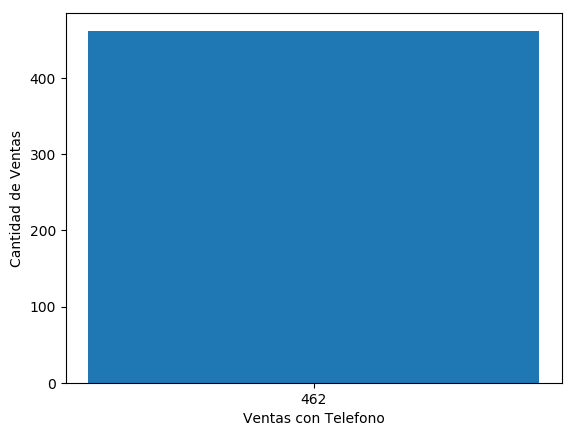

In [73]:
import psycopg2
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt
import numpy as np

myConnection = psycopg2.connect(host = 'localhost', user= 'postgres',password ='pass123', dbname= 'Proyecto1BD')
cur = myConnection.cursor()

cur.execute(' SELECT COUNT(venta.idtienda) FROM venta WHERE venta.mac IS NOT NULL;')
data=cur.fetchall()

label = ('Ventas')
x = np.arange(len(data))
ventas = []

for val in data:
    ventas.append(val[0])


fig, ax = plt.subplots()

plt.bar(x, ventas)
plt.xticks(x, ventas)

ax.set_xlabel('Ventas con Telefono')
ax.set_ylabel('Cantidad de Ventas')

plt.show() 

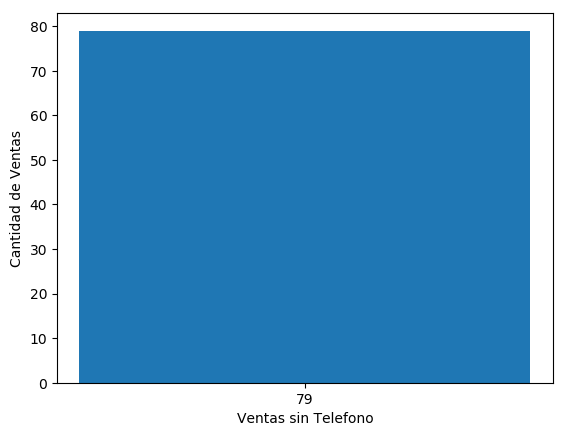

In [74]:
import psycopg2
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt
import numpy as np

myConnection = psycopg2.connect(host = 'localhost', user= 'postgres',password ='pass123', dbname= 'Proyecto1BD')
cur = myConnection.cursor()

cur.execute(' SELECT COUNT(venta.idtienda) FROM venta WHERE venta.mac IS NULL;')
data=cur.fetchall()

label = ('Ventas')
x = np.arange(len(data))
ventas = []

for val in data:
    ventas.append(val[0])


fig, ax = plt.subplots()

plt.bar(x, ventas)
plt.xticks(x, ventas)

ax.set_xlabel('Ventas sin Telefono')
ax.set_ylabel('Cantidad de Ventas')

plt.show() 

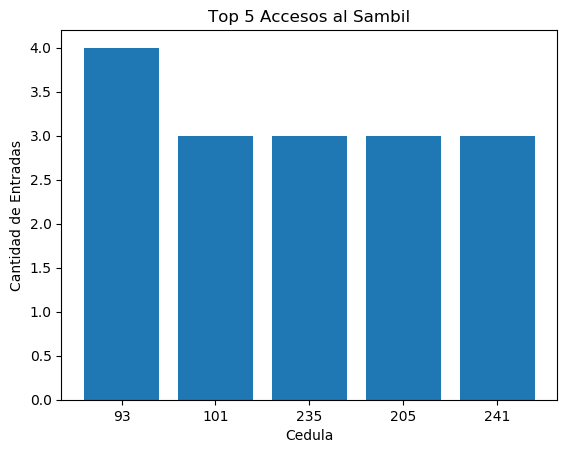

In [81]:
import psycopg2
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt
import numpy as np

myConnection = psycopg2.connect(host = 'localhost', user= 'postgres',password ='pass123', dbname= 'Proyecto1BD')
cur = myConnection.cursor()

cur.execute(" SELECT acceso.cedula, COUNT(acceso.cedula) FROM acceso GROUP BY acceso.cedula ORDER BY (count(*)) DESC LIMIT 5;")
data = cur.fetchall()

label = ('Cedula','Cantidad')
x = np.arange(len(data))
cedula = []
cantidad = []

for val in data:
    cantidad.append(val[1])
    cedula.append(val[0])


fig, ax = plt.subplots()

plt.bar(x, cantidad)
plt.xticks(x, cedula)

ax.set_xlabel('Cedula')
ax.set_ylabel('Cantidad de Entradas')
ax.set_title('Top 5 Accesos al Sambil')

plt.show() 